# 模型训练调优

In [1]:
# Matplotlib for plotting in the notebook
import matplotlib.pyplot as plt

%matplotlib inline

## 还是这些库

In [2]:
from stocker import Stocker

### amazon的股价

In [3]:
amazon = Stocker('AMZN')

AMZN Stocker Initialized. Data covers 1997-05-16 to 2018-03-27.


C:\Users\LOMO\Working_table\2018_7_25\股票\stocker.py:65: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  self.starting_price = float(self.stock.ix[0, 'Adj. Open'])


### 了解下基本情况
也是登顶过首富的。。。


Maximum Adj. Close = 1598.39 on 2018-03-12.
Minimum Adj. Close = 1.40 on 1997-05-22.
Current Adj. Close = 1497.05 on 2018-03-27.



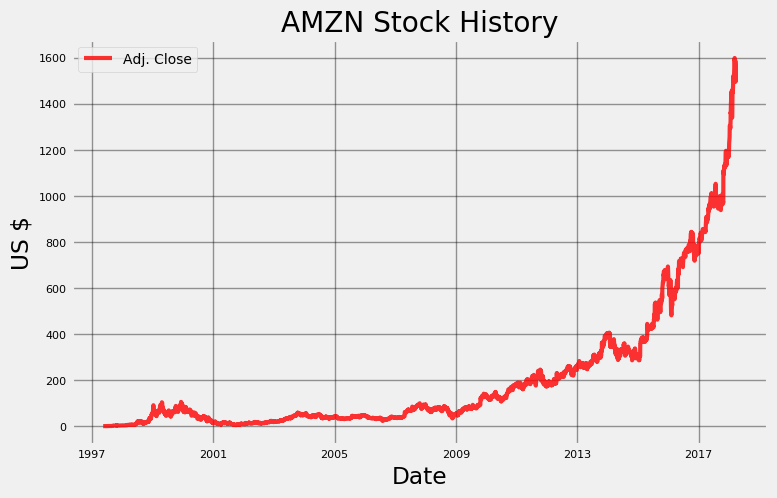

In [4]:
amazon.plot_stock()

### Daily Changes

Maximum Daily Change = 81.38 on 2018-02-06.
Minimum Daily Change = -79.20 on 2018-02-08.
Current Daily Change = -75.35 on 2018-03-27.



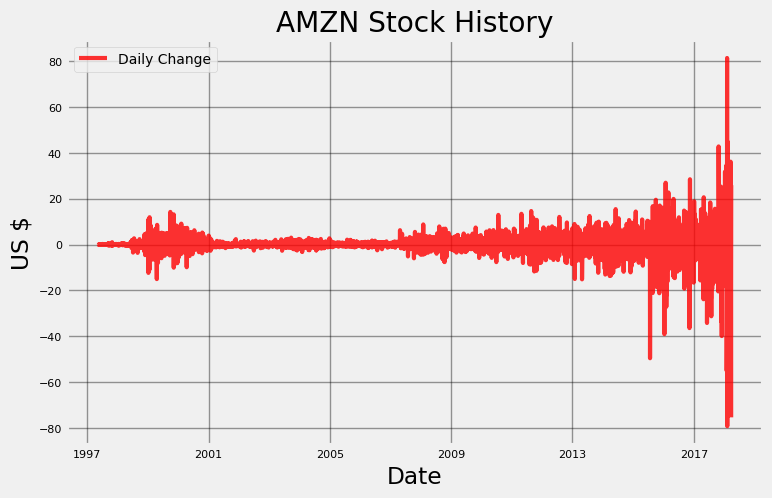

In [6]:
amazon.plot_stock(stats=['Daily Change'])

## 建模

用过去三年的数据来进行建模

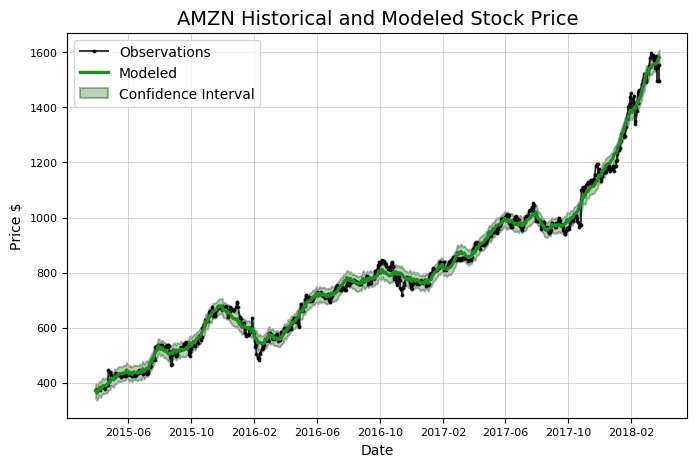

In [7]:
model, model_data = amazon.create_prophet_model()

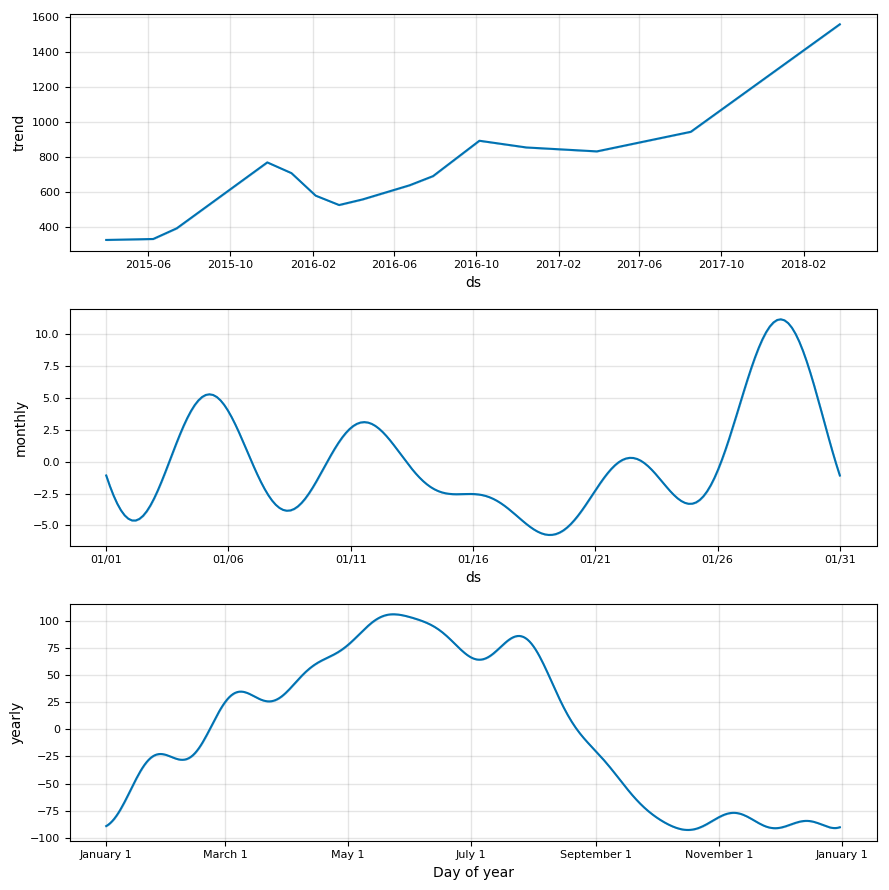

In [8]:
# Variables assigned from previous method call
model.plot_components(model_data)
plt.show()

# 预测

可以来制定预测的天数，立flag三个月后见！

C:\Users\LOMO\Working_table\2018_7_25\股票\stocker.py:453: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  future.ix[len(future) - 1, 'ds'].date(), future.ix[len(future) - 1, 'yhat']))


Predicted Price on 2018-06-25 = $1879.57


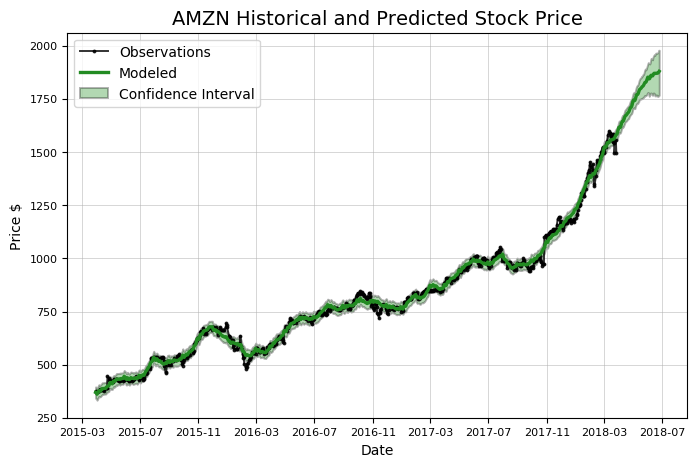

In [9]:
model, model_data = amazon.create_prophet_model(days=90)

观察可以发现，模型其实是更保守一些的，它会降低一些离群数据对结果的影响。

# 模型评估

评估的指标包括：真实值和预测值之间的平均误差，上升与下降趋势，置信区间

C:\Users\LOMO\Working_table\2018_7_25\股票\stocker.py:517: RuntimeWarning: invalid value encountered in sign
  test['correct'] = (np.sign(test['pred_diff']) == np.sign(test['real_diff'])) * 1
C:\Users\LOMO\Working_table\2018_7_25\股票\stocker.py:534: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if (test.ix[i, 'y'] < test.ix[i, 'yhat_upper']) & (test.ix[i, 'y'] > test.ix[i, 'yhat_lower']):
C:\Users\LOMO\Working_table\2018_7_25\股票\stocker.py:546: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  print('\nPredicted price on {} = ${:.2f}.'.format(max(future['ds']).date(), future.ix[len(future) - 1, 'yhat']))



Prediction Range: 2017-03-27 to 2018-03-27.

Predicted price on 2018-03-24 = $1054.94.
Actual price on    2018-03-23 = $1495.56.

Average Absolute Error on Training Data = $16.86.
Average Absolute Error on Testing  Data = $138.46.

When the model predicted an increase, the price increased 56.41% of the time.
When the model predicted a  decrease, the price decreased  40.22% of the time.

The actual value was within the 80% confidence interval 60.24% of the time.


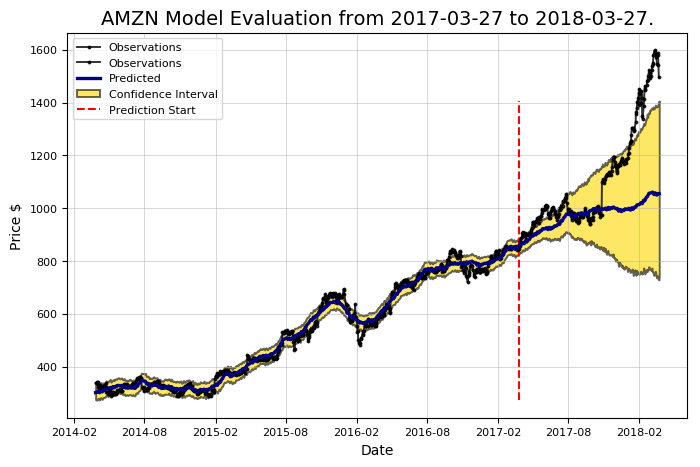

In [10]:
amazon.evaluate_prediction()

模型看起来效果并不好，优化！

# Changepoint Prior Scale 

该参数指定了突变点的权重，突变点就是那些突然上升，下降，或者是幅度突然变化明显的

* 权重大了，模型就会越符合于当前的训练数据集，但是过拟合也更大。
* 权重小了，模型可能就欠拟合了，达不到预期的要求。

## 结果对模型的影响

选择了4组参数[0.001, 0.05, 0.1, 0.2]来观察结果

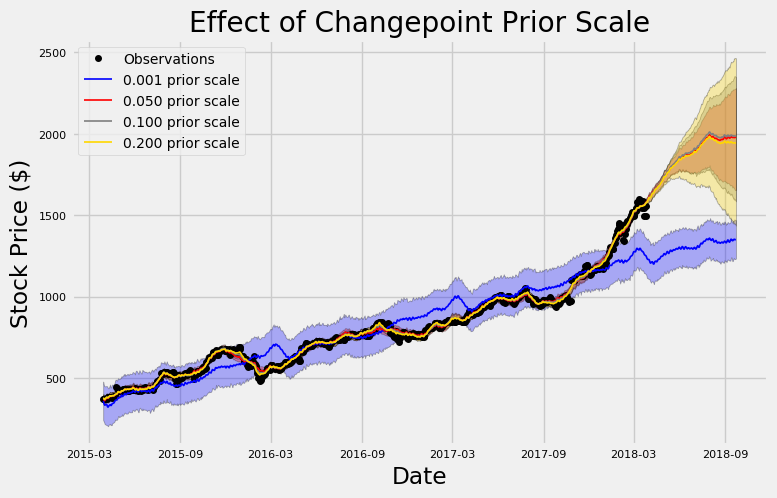

In [11]:
amazon.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

- 先来看蓝色的线，它的参数值设置的是最小的，看起来非常平均，但是欠拟合很明显
- 对于黄色的线，它非常接近于训练数据集，层次鲜明，但是又有过拟合问题
- 默认的参数是0.05，它在中间位置

## 评估
模型的表现情况


Validation Range 2016-01-04 to 2017-01-03.



C:\Users\LOMO\Working_table\2018_7_25\股票\stocker.py:922: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  results.ix[i, 'cps'] = prior


     cps  train_err  train_range    test_err  test_range
0  0.001  44.476286   152.801017  149.378762  152.866170
1  0.050  11.211444    35.868117  148.306555  131.944888
2  0.100  10.688326    34.534512  149.458035  172.768912
3  0.200   9.816318    32.181749  125.815115  315.402818


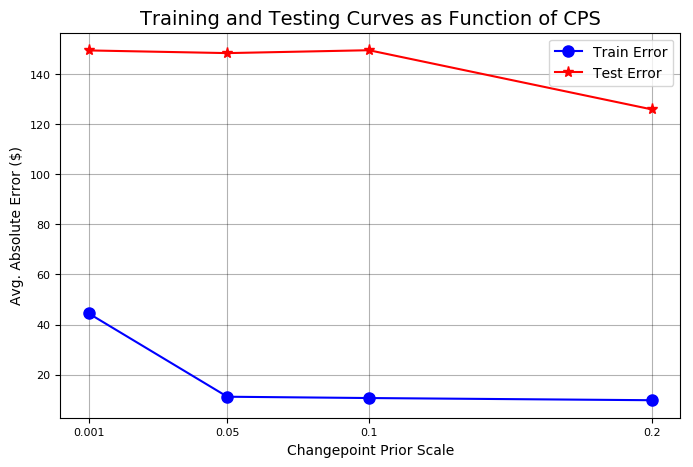

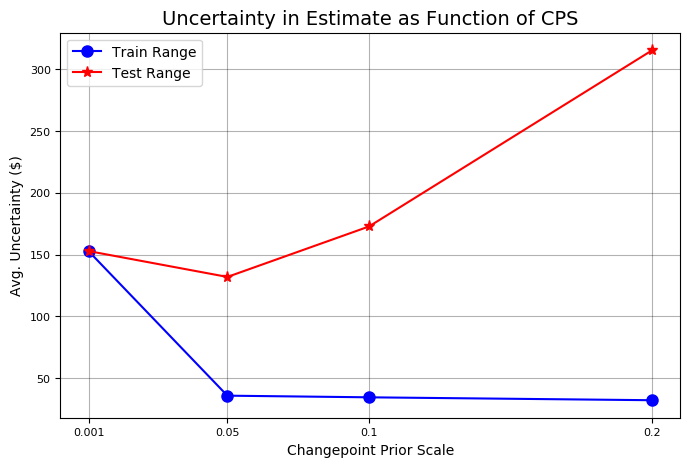

In [12]:
amazon.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.001, 0.05, 0.1, 0.2])

稍微大一点的权重会使得test error更低！

### 既然如此，可以试试更大的！


Validation Range 2016-01-04 to 2017-01-03.



C:\Users\LOMO\Working_table\2018_7_25\股票\stocker.py:922: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  results.ix[i, 'cps'] = prior


    cps  train_err  train_range    test_err   test_range
0  0.25   9.205727    30.477327  108.751674   491.093796
1  0.40   8.658074    29.053499   81.492242   689.116904
2  0.50   8.393657    28.366025   72.326239   889.686760
3  0.60   8.223391    27.939268   70.083564  1018.472036
4  0.70   8.188869    27.814742   79.490063  1000.120342
5  0.80   8.098925    27.581431   73.604174  1140.827365


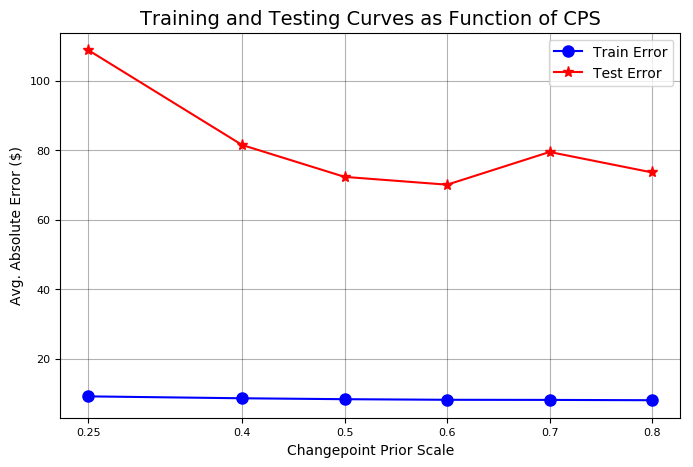

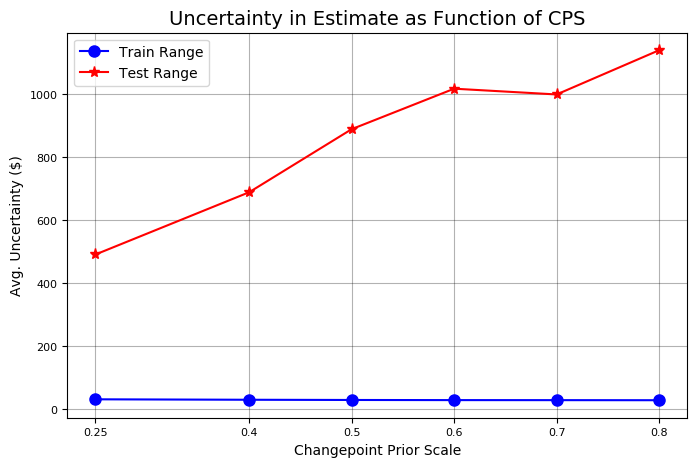

In [13]:
amazon.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.25,0.4, 0.5, 0.6,0.7,0.8])

看起来，0.6是最低的了！

In [14]:
amazon.changepoint_prior_scale = 0.6

### 再次评估模型

C:\Users\LOMO\Working_table\2018_7_25\股票\stocker.py:517: RuntimeWarning: invalid value encountered in sign
  test['correct'] = (np.sign(test['pred_diff']) == np.sign(test['real_diff'])) * 1
C:\Users\LOMO\Working_table\2018_7_25\股票\stocker.py:534: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if (test.ix[i, 'y'] < test.ix[i, 'yhat_upper']) & (test.ix[i, 'y'] > test.ix[i, 'yhat_lower']):
C:\Users\LOMO\Working_table\2018_7_25\股票\stocker.py:546: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  print('\nPredicted price on {} = ${:.2f}.'.format(max(future['ds']).date(), future.ix[len(future) - 1, 'yhat']))



Prediction Range: 2017-03-27 to 2018-03-27.

Predicted price on 2018-03-24 = $967.61.
Actual price on    2018-03-23 = $1495.56.

Average Absolute Error on Training Data = $10.68.
Average Absolute Error on Testing  Data = $202.49.

When the model predicted an increase, the price increased 60.96% of the time.
When the model predicted a  decrease, the price decreased  47.06% of the time.

The actual value was within the 80% confidence interval 81.53% of the time.


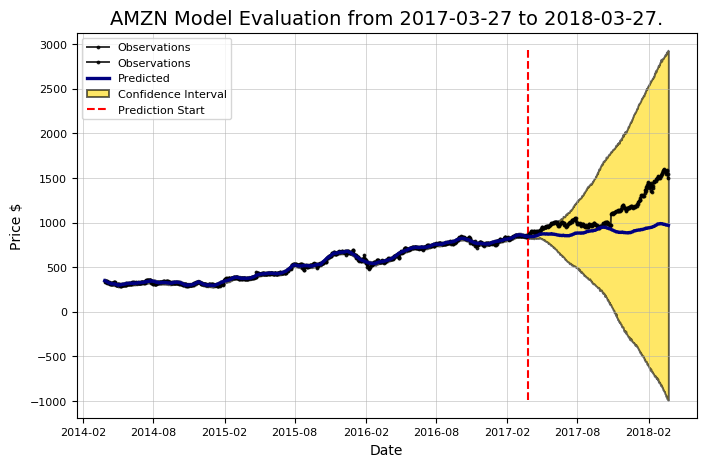

In [15]:
amazon.evaluate_prediction()

这次看起来还可以！

## Hi friends I want to play a Game!


C:\Users\LOMO\Working_table\2018_7_25\股票\stocker.py:517: RuntimeWarning: invalid value encountered in sign
  test['correct'] = (np.sign(test['pred_diff']) == np.sign(test['real_diff'])) * 1
C:\Users\LOMO\Working_table\2018_7_25\股票\stocker.py:534: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if (test.ix[i, 'y'] < test.ix[i, 'yhat_upper']) & (test.ix[i, 'y'] > test.ix[i, 'yhat_lower']):
C:\Users\LOMO\Working_table\2018_7_25\股票\stocker.py:603: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  prediction_profit.append(nshares * test_pred_increase.ix[i, 'real_diff'])
C:\Users\LOMO\Working_table\2018_7_25\股票\stocker.py:608: SettingWithCo

You played the stock market in AMZN from 2017-03-27 to 2018-03-27 with 1000 shares.

When the model predicted an increase, the price increased 60.96% of the time.
When the model predicted a  decrease, the price decreased  47.06% of the time.

The total profit using the Prophet model = $518090.00.
The Buy and Hold strategy profit =         $648740.00.

Thanks for playing the stock market!



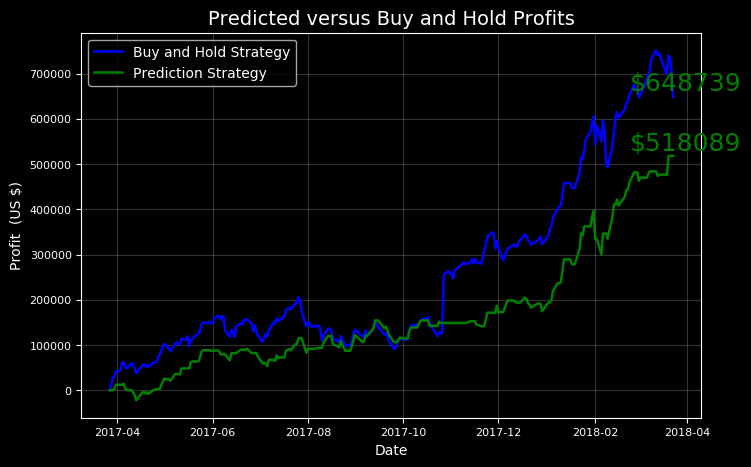

In [16]:
amazon.evaluate_prediction(nshares=1000)

#### 换个时间

C:\Users\LOMO\Working_table\2018_7_25\股票\stocker.py:517: RuntimeWarning: invalid value encountered in sign
  test['correct'] = (np.sign(test['pred_diff']) == np.sign(test['real_diff'])) * 1
C:\Users\LOMO\Working_table\2018_7_25\股票\stocker.py:534: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if (test.ix[i, 'y'] < test.ix[i, 'yhat_upper']) & (test.ix[i, 'y'] > test.ix[i, 'yhat_lower']):
C:\Users\LOMO\Working_table\2018_7_25\股票\stocker.py:606: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  prediction_profit.append(nshares * test_pred_increase.ix[i, 'real_diff'])
C:\Users\LOMO\Working_table\2018_7_25\股票\stocker.py:608: SettingWithCo

You played the stock market in AMZN from 2008-01-03 to 2009-01-05 with 1000 shares.

When the model predicted an increase, the price increased 46.24% of the time.
When the model predicted a  decrease, the price decreased  61.54% of the time.

The total profit using the Prophet model = $-1580.00.
The Buy and Hold strategy profit =         $-43930.00.

Thanks for playing the stock market!



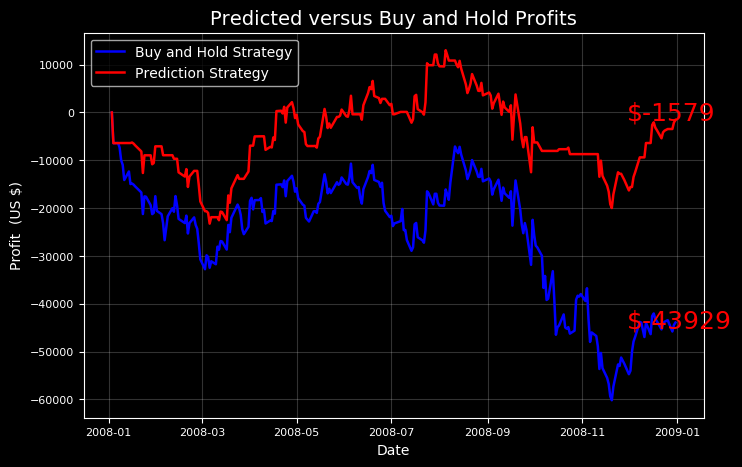

In [17]:
amazon.evaluate_prediction(start_date = '2008-01-03', end_date = '2009-01-05', nshares=1000)

# 预测未来的价格


Predicted Increase: 

         Date     estimate     change        upper        lower
1  2018-03-28  1574.350100   2.107798  1595.593529  1552.953466
2  2018-03-29  1578.063044   3.712944  1600.070378  1557.981681
3  2018-03-30  1584.423177   6.360133  1605.402511  1562.327801
5  2018-04-01  1597.377361  12.954183  1618.231663  1573.865161
6  2018-04-02  1599.188631   1.811270  1622.299018  1576.035496
8  2018-04-04  1598.948476   0.357094  1620.622387  1576.350524
9  2018-04-05  1602.782931   3.834455  1625.039679  1581.896174
10 2018-04-06  1609.574777   6.791845  1630.984865  1587.670785

Predicted Decrease: 

        Date     estimate    change        upper        lower
7 2018-04-03  1598.591381 -0.597249  1618.898877  1575.291564


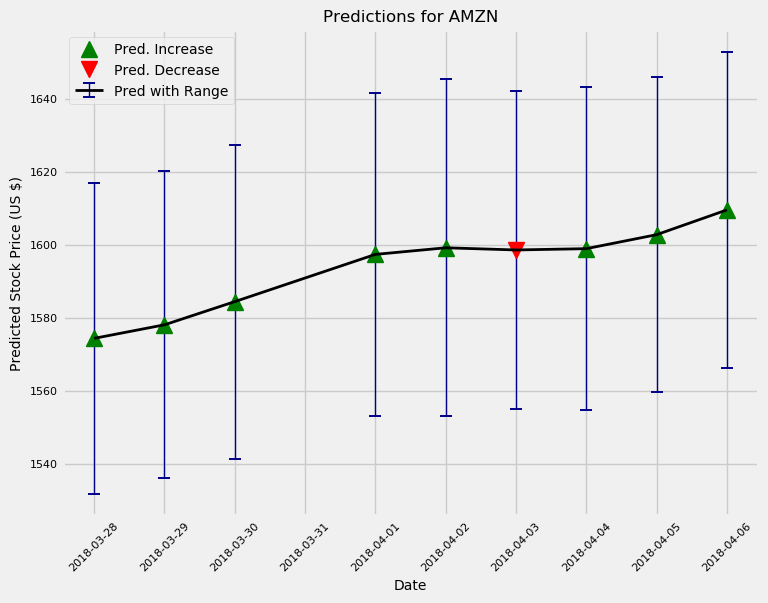

In [18]:
amazon.predict_future(days=10)


Predicted Increase: 

         Date     estimate     change        upper        lower
1  2018-03-28  1574.350100   2.107798  1594.956067  1551.905213
2  2018-03-29  1578.063044   3.712944  1598.733718  1558.394519
3  2018-03-30  1584.423177   6.360133  1607.377698  1562.432847
5  2018-04-01  1597.377361  12.954183  1618.782489  1574.585072
6  2018-04-02  1599.188631   1.811270  1622.044242  1577.399970
8  2018-04-04  1598.948476   0.357094  1620.989935  1575.742016
9  2018-04-05  1602.782931   3.834455  1624.216020  1578.753988
10 2018-04-06  1609.574777   6.791845  1631.544011  1586.383398
12 2018-04-08  1620.298927  10.724150  1643.204709  1596.366285
13 2018-04-09  1621.564800   1.265873  1646.030974  1599.360839
14 2018-04-10  1622.721137   1.156337  1646.475869  1598.817438
15 2018-04-11  1626.395909   3.674773  1649.893333  1601.786885
16 2018-04-12  1632.740320   6.344411  1655.505099  1606.592101
17 2018-04-13  1639.320953   6.580633  1664.650879  1614.253861
19 2018-04-15  16

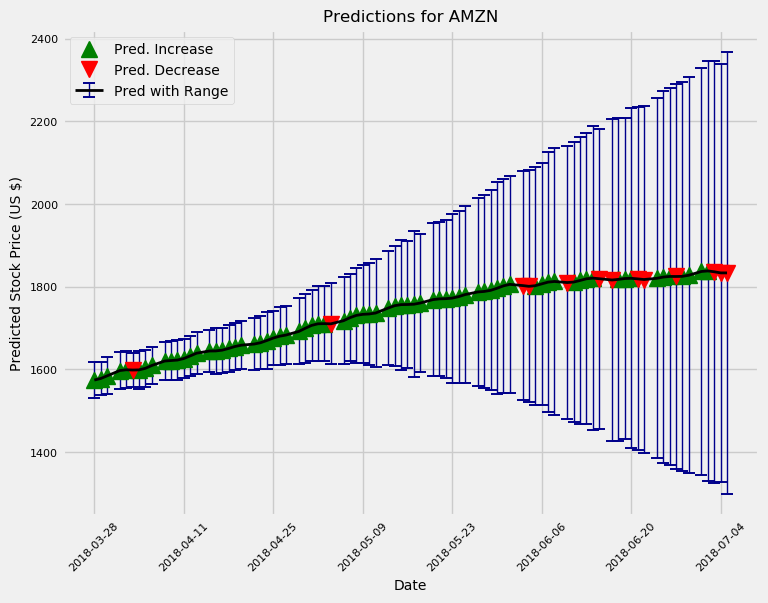

In [19]:
amazon.predict_future(days=100)

The uncertainty increases the farther out in the future we predict. This is to be expected because the initial forecasted values have some uncertainty, and the next values are made based on the previous ones, so the range of possible values grows over time. 

Whenever we make a prediction, we must be sure to include uncertainty intervals because there are no processes that can be exactly estimated in the future. While most people interpret a confidence interval as a lack of confidence, it really displays that we know the limitations of our model. 